In [1]:
import pandas as pd
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
data=data.drop(["Surname"],axis=1)

In [20]:
data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


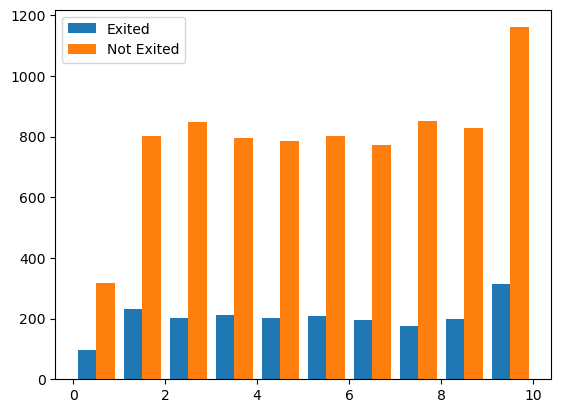

In [21]:
import matplotlib.pyplot as plt
tenureyes = data[data.Exited == 1].Tenure
tenureno = data[data.Exited == 0].Tenure
plt.hist([tenureyes,tenureno], label=['Exited', 'Not Exited'])
plt.legend()

In [22]:
data['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [23]:
data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [30]:
data=pd.get_dummies(data=data,columns=['Geography'])

In [31]:
data.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [32]:
data.dtypes

RowNumber              int64
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [35]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
columnscale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Scale = MinMaxScaler()
data[columnscale] = Scale.fit_transform(data[columnscale])

In [36]:
data.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,2,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,3,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,4,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,5,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [40]:
X=data.drop('Exited',axis='columns')
Y=data['Exited']

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [42]:
xtrain

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
2694,2695,0.556,0,0.148649,0.3,0.450968,0.333333,0,1,0.623747,0,1,0
5140,5141,0.552,1,0.148649,0.4,0.421555,0.333333,0,0,0.205486,1,0,0
2568,2569,0.524,1,0.391892,0.6,0.518238,0.000000,1,1,0.228715,0,1,0
3671,3672,0.592,1,0.459459,0.6,0.445358,0.333333,0,1,0.341811,0,1,0
7427,7428,0.728,0,0.202703,0.8,0.486322,0.000000,0,0,0.812596,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,2896,0.542,0,0.391892,0.7,0.427916,0.000000,1,1,0.333970,0,1,0
7813,7814,0.668,1,0.608108,0.3,0.323820,0.000000,1,0,0.348192,0,1,0
905,906,0.644,1,0.364865,0.9,0.000000,0.000000,1,1,0.460124,1,0,0
5192,5193,0.626,1,0.283784,0.8,0.000000,0.333333,1,1,0.505835,1,0,0


In [43]:
print(xtrain.shape)
print(xtest.shape)

(8000, 13)
(2000, 13)


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
r = RandomForestClassifier()
r.fit(xtrain, ytrain)
ypred = r.predict(xtest)
accuracy=accuracy_score(ytest, ypred)
print("   Random Forest Classifier")
print("Accuracy score is: {}%".format(round(accuracy*100,2)))
from sklearn.metrics import classification_report
report = classification_report(ytest, ypred)
print(report)

   Random Forest Classifier
Accuracy score is: 86.05%
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.80      0.44      0.57       415

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lrc = LogisticRegression(max_iter=1000)
lrc.fit(xtrain,ytrain)
ypred=lrc.predict(xtest)
accuracy = accuracy_score(ytest,ypred)
print("     Logistic Regression")
print("Accuracy score is: {}%".format(round(accuracy*100,2)))
from sklearn.metrics import classification_report
report = classification_report(ytest, ypred)
print(report)


     Logistic Regression
Accuracy score is: 81.35%
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1585
           1       0.68      0.20      0.30       415

    accuracy                           0.81      2000
   macro avg       0.75      0.59      0.60      2000
weighted avg       0.79      0.81      0.77      2000



In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
g=GradientBoostingClassifier()
g.fit(xtrain, ytrain)
ypred=g.predict(xtest)
accuracy=accuracy_score(ytest, ypred)
print("   Gradient Boosting Classifier")
print("Accuracy score is: {}%".format(round(accuracy*100,2)))


   Gradient Boosting Classifier
Accuracy score is: 86.25%


In [53]:
from sklearn.metrics import classification_report
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.78      0.47      0.59       415

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

